# Demonstating Gradient Descent using Linear Regression
This is a response to Siraj's Challenge to implement gradient descent to find the line of best fit that predicts the relationship between 2 variables from a kaggle dataset.

In [92]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

## Data Preparation

In [93]:
# Importing csv dataset with pandas
data = pd.read_csv('kc_house_data.csv')

print data.index
print len(data.index)

# Using the first 5000 rows for training
data = data[:10000]

# Looking at the first 5 rows of dataset
data.head()

RangeIndex(start=0, stop=21613, step=1)
21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


20000


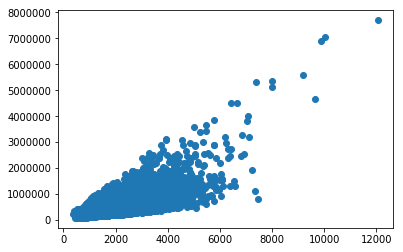

In [94]:
# Using sqft_living as X_values and price as Y_values, we want to predict the price
# of a house given the lot size in King's County
points = data.as_matrix(['sqft_living', 'price'])
print points.size
# Looking at the plot of the points, we can see a linear trend 
plt.scatter(points[:,0], points[:,1])
plt.show()

## Linear Regression and Gradient Descent
Over here, we define a function to compute the sum of squared errors, as shown below. The goal of linear regression is to minimise this error, which is termed as the cost function.

![Sum of Squared Error](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)

In [95]:
print len(points)

10000


In [96]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

Here, we define a step function to:
1. compute the gradients of b and m, for each data point, according to the partial derivative formulas.
2. update the current b and m values using the product of learning rate and gradients of b and m.
![Partial Derivative](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)

In [97]:
def step_gradient(b_current, m_current, points, learningRate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        #if i %100 == 0:
        #    print ("I = {0} B_Grad={1} M_Grad={2} b_current={3} m_current={4}".format(i, b_gradient, m_gradient, b_current, m_current))
        #    print "-------"
    new_m = m_current - (learningRate * m_gradient)
    new_b = b_current - (learningRate * b_gradient)
    return [new_b, new_m]

In [98]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        # Every 100 iterations, prints b and m and error
        if i % 10 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

My Custom smaller Steps to see the output

In [99]:
    learning_rate = .00000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    print b,m

Starting gradient descent at b = 0, m = 0, error = 4.26386764826e+11
Running...
Iteration 0, b:0.010666231912, m:26.7194635025, error:3.58595700365e+11
Iteration 10, b:0.0720382741639, m:182.617039733, error:1.06696120695e+11
Iteration 20, b:0.091869527914, m:236.431610432, error:76680421232.8
Iteration 30, b:0.0973612407684, m:255.007961302, error:73103828434.4
Iteration 40, b:0.0979030612566, m:261.420366466, error:72677650891.6
Iteration 50, b:0.0967362193689, m:263.633876911, error:72626868645.3
Iteration 60, b:0.0949795612275, m:264.397963191, error:72620817527.1
Iteration 70, b:0.0930193033769, m:264.661720085, error:72620096453.9
Iteration 80, b:0.0909887646139, m:264.752767362, error:72620010495.1
Iteration 90, b:0.0889339654985, m:264.78419669, error:72620000214.8
Iteration 100, b:0.086870791952, m:264.795046388, error:72619998952.1
Iteration 110, b:0.084804727665, m:264.798792166, error:72619998764.0
Iteration 120, b:0.0827376655625, m:264.800085729, error:72619998704.0
Itera

Default Settings

In [90]:
# Hyperparameters
learning_rate = 0.0000001
iterations = 1000

b, m = run(learning_rate, iterations)

Starting gradient descent at b = 0, m = 0, error = 4.26386764826e+11
Running...
Iteration 0, b:0.10666231912, m:267.194635025, error:72648911453.9
Iteration 10, b:0.0850122895108, m:264.800766281, error:72619998748.7
Iteration 20, b:0.064336410682, m:264.800774694, error:72619998321.2
Iteration 30, b:0.0436605386577, m:264.800783108, error:72619997893.7
Iteration 40, b:0.0229846734377, m:264.800791522, error:72619997466.2
Iteration 50, b:0.0023088150221, m:264.800799935, error:72619997038.7
Iteration 60, b:-0.0183670365891, m:264.800808349, error:72619996611.2
Iteration 70, b:-0.039042881396, m:264.800816763, error:72619996183.7
Iteration 80, b:-0.0597187193984, m:264.800825176, error:72619995756.2
Iteration 90, b:-0.0803945505965, m:264.80083359, error:72619995328.7
Iteration 100, b:-0.10107037499, m:264.800842003, error:72619994901.2
Iteration 110, b:-0.12174619258, m:264.800850417, error:72619994473.7
Iteration 120, b:-0.142422003365, m:264.800858831, error:72619994046.3
Iteration 1

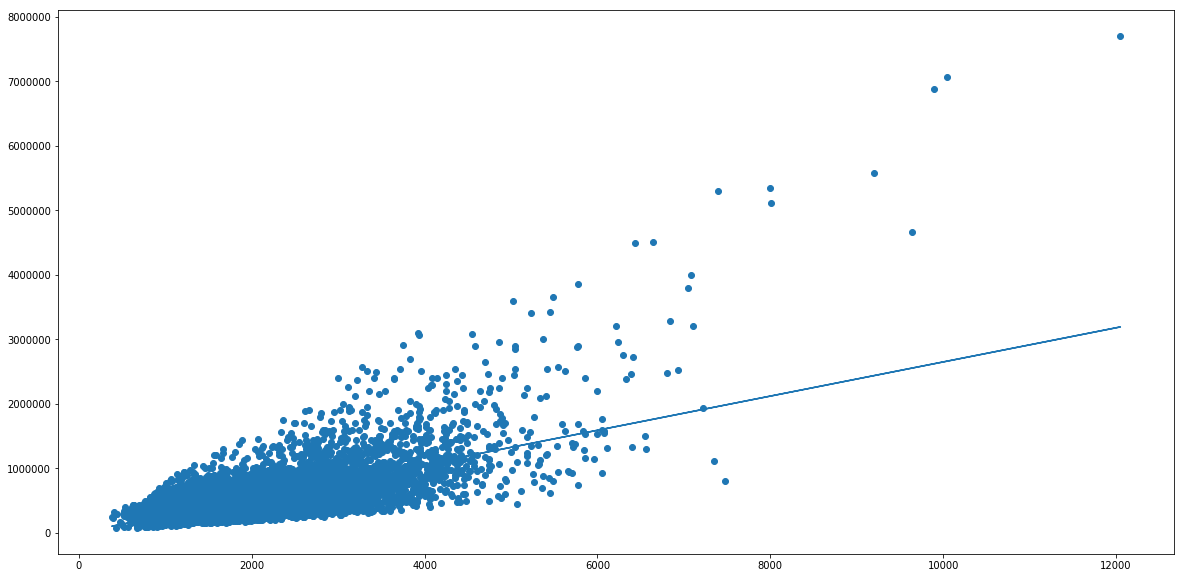

In [91]:
# Comparing best-fit line with dataset
plt.figure(figsize=(20,10))
plt.plot(points[:,0], predict(b, m, points[:,0]))
plt.scatter(points[:,0], points[:,1])
plt.show()

## Prediction
Using the learned b and m, we can predict the price of any house in King's County!

In [ ]:
living_size = [2000] # Change this variable
price = predict(b, m, living_size)
print("Price predicted for a house with living size of {} sqft in King's County is ${}".format(living_size, price[0]))

## Visualisation of Gradients

### 3D Surface Plot

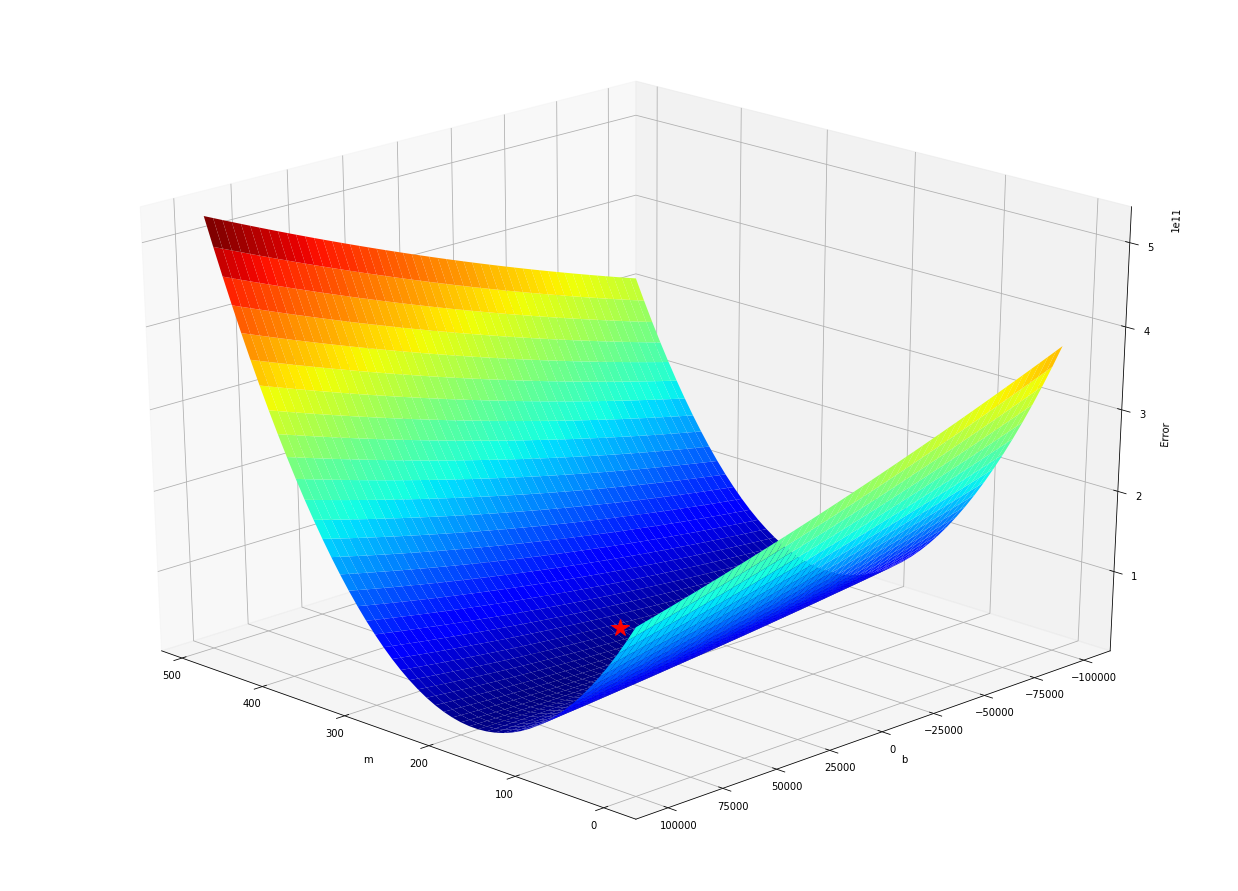

In [38]:
m_array = np.arange(0,500,10)
b_array = np.arange(100000,-100000,-1000)
X, Y = np.meshgrid(m_array, b_array)
f  = lambda m, b: compute_error_for_line_given_points(b, m, points[:10])
Z = f(X,Y)

fig = plt.figure(figsize=(48,16))
ax = fig.add_subplot(121, projection='3d', elev=25, azim=135)

ax.plot_surface(X, Y, Z, cmap=plt.cm.jet)
ax.plot([m], [b], f(m,b),'r*', markersize=18)

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('Error')

plt.show()

### 2D Contour Plot

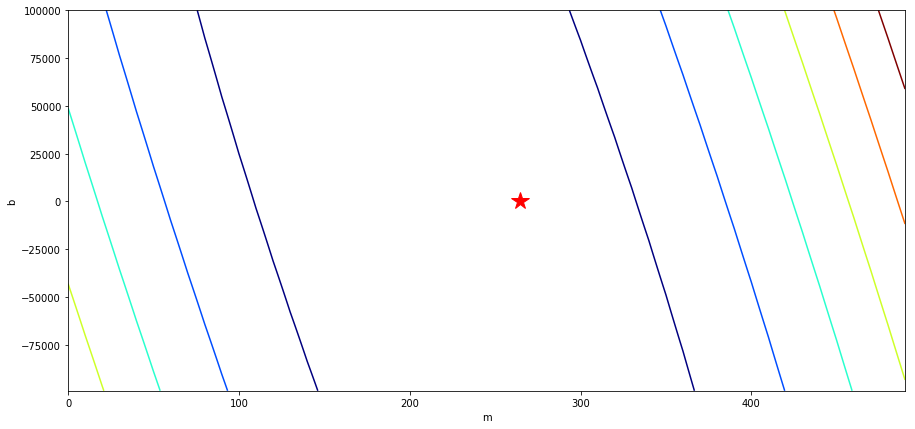

In [11]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.contour(X, Y, Z, cmap=plt.cm.jet)
ax.plot(m, b, 'r*', markersize=18)

ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()